In [1]:
# lets make a linear regression from scratch

# **Comparing Linear Regression**
# Implementations: Normal Equation vs. Gradient Descent
In this notebook, we will build and compare two different implementations of linear regression: one using the Normal Equation and the other using Gradient Descent. To illustrate the differences and evaluate their performance, we will use a sample dataset from Kaggle. This comparative study aims to provide insights into the practical applications, efficiency, and accuracy of both methods.

In [2]:
# we will be using only these libraries
import numpy as np
import pandas as pd

In [3]:
# sample dataset
df=pd.read_csv('/kaggle/input/multiple-linear-regression-dataset/multiple_linear_regression_dataset.csv')
print('len=',len(df))
df.head()

len= 20


,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [4]:
# first we need to prepare the data for our model to learn and test from 
# assuming the data is clean

In [5]:
# function to split the data into train and test in a ratio
def train_test_split(dataset,test_ratio,random_seed):
    
    shuffled_df = dataset.sample(frac=1,random_state=random_seed).reset_index(drop=True)
    # If you use frac=0.5, it will randomly sample and shuffle 50% of the rows in the DataFrame
    train_df=shuffled_df.iloc[:-int(20*0.2)]
    test_df=shuffled_df.iloc[-int(20*0.2):]
    return train_df,test_df

In [6]:
# we can split the data to train test 
train,test=train_test_split(dataset=df,test_ratio=0.2,random_seed=42)
train.head()

,age,experience,income
0,25,1,30450
1,23,1,30870
2,41,6,38900
3,30,3,35670
4,37,5,40250


In [7]:
# .values convert the dataframe to array representation
X_train=train[['age','experience']].values
y_train=train['income'].values
X_test=test[['age','experience']].values
y_test=test['income'].values

# NORMAL EQUATION
The Normal Equation provides a closed-form solution to the linear regression problem, allowing us to directly compute the optimal parameters without iterative optimization

In [8]:
# we will be using normal equation to compute the coeff of the linaer equation
# The @ operator is used for matrix multiplication.
# normal equation: (X.T @ X)theta=X.T @ y

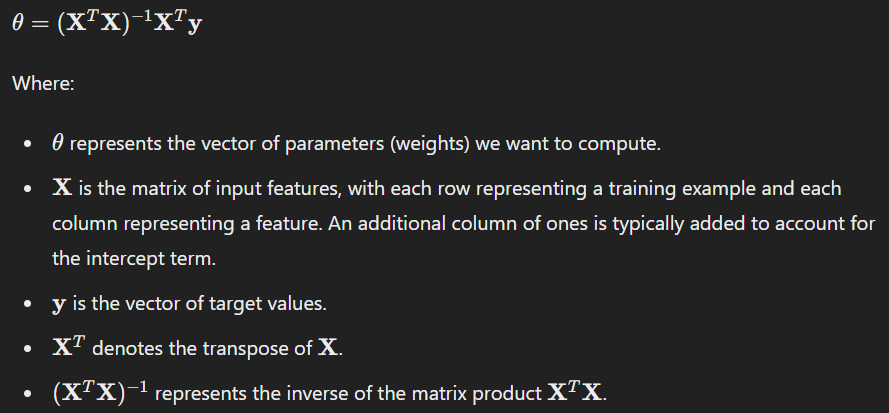

In [9]:
# create column with value 1 for x0
column_of_ones = np.ones((X_train.shape[0], 1))
# add column to matrix X_train
X = np.c_[column_of_ones, X_train]
y = y_train

>**NOTE**: Keep in mind that while the normal equation provides a closed-form solution, it may not be computationally efficient for very large datasets. For large datasets, gradient descent or other optimization algorithms are often preferred

In [10]:
theta = np.linalg.inv(X.T @ X) @ X.T @ y
theta # array([intercept,b1,b2,...])

array([31118.15030061,   -91.86306325,  2149.28778307])

In [11]:
theta.shape

(3,)

In [12]:
column_of_ones = np.ones((X_test.shape[0], 1))
# add column to matrix X_train
X_test1 = np.c_[column_of_ones, X_test]
X_test1.shape

(4, 3)

In [13]:
y_pred_without_sklearn=X_test1 @ theta
y_pred_without_sklearn

array([36683.82034558, 30603.40924938, 52867.62891438, 39292.42344491])

In [14]:
# now lets check our moedl against the moedl created using sklearn
from sklearn.linear_model import LinearRegression

# Creating a Linear Regression model
model = LinearRegression()

# Fitting the model to the data
model.fit(X_train, y_train)

Y_pred = model.predict(X_test)
print(Y_pred)
test['predicted sklearn income']=Y_pred

print('coeff of model=',model.coef_)
print('intercept of model=',model.intercept_)

[36683.82034558 30603.40924938 52867.62891438 39292.42344491]
coeff of model= [ -91.86306325 2149.28778307]
intercept of model= 31118.150300615525


In [15]:
test['my model income']=y_pred_without_sklearn
test 

,age,experience,income,predicted sklearn income,my model income
16,33,4,37650,36683.820346,36683.820346
17,29,1,27840,30603.409249,30603.409249
18,44,12,51300,52867.628914,52867.628914
19,28,5,41340,39292.423445,39292.423445


In [16]:
# wow! both the predicted values are the same.

NOTE: scikit-learn uses an optimized version of the Least Squares method, specifically the Singular Value Decomposition (SVD) approach, which is more numerically stable and efficient than directly computing the Normal Equation

In [17]:
# now lets build gradient descent from scratch and check it againest gradient descent from the sklearn.

In [18]:
X=X_train

In [19]:
# Standardize features
column_of_ones = np.ones((X_train.shape[0], 1))
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X = (X - X_mean) / X_std
X=np.c_[column_of_ones, X]
X.shape

(16, 3)

In [20]:
y

array([30450, 30870, 38900, 35670, 40250, 41630, 46110, 40130, 44190,
       63600, 34800, 31580, 45150, 48700, 47830, 36720])

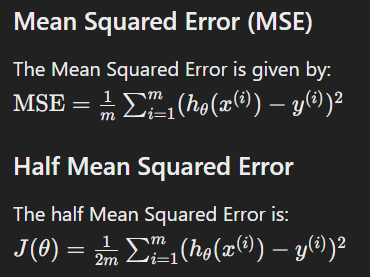

In [21]:
# Initialize parameters
theta = np.random.randn(X.shape[1])
# Define the learning rate and number of iterations
learning_rate = 0.001
n_iterations = 500000
theta

array([ 0.99772375, -0.15690996,  0.96914733])

In [22]:
# Cost function: half Mean Squared Error
def compute_cost(X, y, theta, predictions):
    m = len(y)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

gradient of the cost function

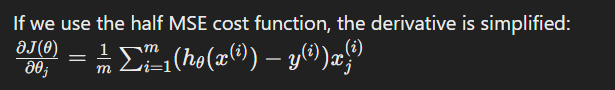

In [23]:
# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    m = len(y)
    threshold=0.0001
    cost_history=[]
    for i in range(n_iterations):
        predictions = X @ theta
        errors = predictions - y
        cost_history.append(compute_cost(X, y,theta ,predictions))
        gradients = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradients
        
        if np.linalg.norm(gradients) < threshold:
            print(f"Early stopping at iteration {i}")
            break
    return theta, cost_history

In [24]:
# Run gradient descent
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

Early stopping at iteration 41347


In [25]:
theta_final

array([41036.25      ,  -907.20208481,  8592.9521087 ])

In [26]:
column_of_ones = np.ones((X_test.shape[0], 1))
X_test2 = np.c_[column_of_ones, X_test]
y_pred_with_gradient=X_test2 @ theta_final
y_pred_with_gradient

array([ 45470.38963599,  23320.34164913, 104234.78357266,  58599.35216875])

In [27]:
test['gradient_descent income']=y_pred_with_gradient
test 

,age,experience,income,predicted sklearn income,my model income,gradient_descent income
16,33,4,37650,36683.820346,36683.820346,45470.389636
17,29,1,27840,30603.409249,30603.409249,23320.341649
18,44,12,51300,52867.628914,52867.628914,104234.783573
19,28,5,41340,39292.423445,39292.423445,58599.352169


In [28]:
# The SGDRegressor is a linear model performing stochastic Gradient Descent (SGD) for linear regression tasks

In [29]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

model = SGDRegressor()
model.fit(X_train_scaled, y)
prediction=model.predict(X_test)

In [30]:
test['sklearn_gradient_descent income']=prediction
test['sklearn_gradient_descent income'] =test['sklearn_gradient_descent income'].astype(int) 
test

,age,experience,income,predicted sklearn income,my model income,gradient_descent income,sklearn_gradient_descent income
16,33,4,37650,36683.820346,36683.820346,45470.389636,45867
17,29,1,27840,30603.409249,30603.409249,23320.341649,23702
18,44,12,51300,52867.628914,52867.628914,104234.783573,104676
19,28,5,41340,39292.423445,39292.423445,58599.352169,58915


In [31]:
# our custom made gradient descent and the gradient descent from the sklearn
# are producing almost same result

But why is the actual values and predicted values not the same?